<a href="https://colab.research.google.com/github/pragnya2001/Uber-request-data-EDA/blob/main/Uber_Request_Data_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Uber Request Data EDA



##### **Project Type**    - EDA
##### **Contribution**    - Pragnyasmita chand

# **Project Summary -**

This project focuses on performing exploratory data analysis(EDA) on uber ride requests during july,2016 to uncover critical operational inefficiencies, customer behavior patterns and service and service availability isssues. Uber, a global ride-hailling service, depends heavily on data-driven decision-making for efficient driver allocation, improving user experience and reducing service failuers. The primary aim of this project is to extract actionable insights that could help uber optimize its performance across different pickup zones and time slots.

The dataset used for this analysis contains over 6,700 ride request records with details such as requestID, pickup-point, request timestamp, drop timestamp and final status of the ride. The analysis was conducted using three tools: MySQL Workbench for data cleaning , microsoft excel for visualization and dashboarding and python for in-depth EDA.

In the initial phase, the dataset was cleaned using SQL queries in MySQL Workbench. Duplicate records were eliminated, null values were assessed and inconsistent timestamp formats were standardized. New columns such as request hour and request date were derived to enable time-based analysis. Once the cleaned data was exported to excel, key visualizations were created to understand service performance trends.

Excel dashboard highlighted that ride requests peaked during morning[5am-10am] and evening [5pm-10pm] hours, reflecting common commuting windows. A breakdown by pickup point revealed that the Airport faced a disproportionately higher number of cancellation and 'no car available' incidents compared to the city. This suggests either a mismatch in driver availability at the airport or a surge in demand not met by supply.

Further, EDA in python provided a more granular view of the same trends. Visualizations such as line plots, bar charts and heatmaps showed:
  - Most cancellation occured during morning hours from the city, possibly due to drivers rejecting long riderd to the airport.
  - no car available issues peaked in the evening from the airport, indicating an insufficient number of returning drivers.
  - completed rides were relatively consistent in mid-day hours, when demand and supply were balanced.

The project concludes that uber's major challenges lies in driver-side availability, particularly in handling directional demand - most riders want to go from city to airport in the morning and return in the evening. By implementing targeted incentivies or pre-scheduled pickups during peak hours, uber could balance the supply and improve customer satisfaction.

This project demonstrates the importance of EDA in operational planning and demand forecasting for ride-hailing platforms. Through structured data cleaning, visualization and insight generation, this analysis offers practical recommendations to reduce cancellations, improve reliability and optimize driver deployement across time and geography.

# **GitHub Link -**

https://github.com/pragnya2001

# **Problem Statement**


Despite Uber's widespread presence and popularity, users often face challenges such as ride cancellations and unavailability of cars, especislly during peak hours and at specific locations. These service disruptions not only affect customer satisfaction but also lead to operational inefficiencies and revenue loss for uber.
 This project aims to analyze uber ride request data from july 2016 to identify the root causes of ride failuers, particularly focusing on:

    - High cancellation rates by drivers,
    - No cars available issues
    - Variations in request patterns across different times of the day and pickup points.
By uncovering these patterns through EDA, the goal is to provide data-driven recommendation to optimize driver allocation, improve service reliability and enhance the overall user experience.



#### **Define Your Business Objective?**

The primary business objective of this project is to analyze Uber ride request patterns to improve operational efficiency and enhance service reliability. By identifying when and where ride requests are most likely to be cancelled or unfulfilled, uber can take proactive steps to:
  - Optimize driver distribution across different pickup zones.
  - Reduce ride cancellation by understanding driver behavior during peak hours.
  - Minimize no cars available incidents by forecasting demand more accurately.
  - Improve customer satisfaction and retention by ensuring availability during critical hours.

Ultimately, the goal is to provide actionable insights that enable uber to make smarter, data-backed decisions for better resource planning, leading to higher ride fulfilment rates, lower service disruptions and increased revenue.



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

In [ ]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Optional: Set Seaborn style for better aesthetics
sns.set(style="whitegrid")


### Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Uber cleaned data.csv to Uber cleaned data.csv


### Dataset First View

In [ ]:
# Dataset First Look

In [ ]:
# Load the CSV file
df = pd.read_csv('Uber cleaned data.csv')

# Display the first 5 rows
df.head()


,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,driver_id_clean,request_time_clean,drop_time_clean
0,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,1.0,2016-07-13 08:33:16,2016-07-13 09:25:47
1,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,1.0,2016-07-13 21:57:28,2016-07-13 22:28:59
2,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,1.0,2016-07-14 06:15:32,2016-07-14 07:13:15
3,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,1.0,2016-07-15 05:11:52,2016-07-15 06:07:52
4,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,1.0,2016-07-15 17:57:27,2016-07-15 18:50:51


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

In [ ]:
# Get the number of rows and columns
df.shape


(5595, 9)

### Dataset Information

In [ ]:
# Dataset Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595 entries, 0 to 5594
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   request_id          5595 non-null   int64  
 1   pickup_point        5595 non-null   object 
 2   driver_id           2945 non-null   float64
 3   status              5595 non-null   object 
 4   request_timestamp   5595 non-null   object 
 5   drop_timestamp      1681 non-null   object 
 6   driver_id_clean     2945 non-null   float64
 7   request_time_clean  4071 non-null   object 
 8   drop_time_clean     1681 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 393.5+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

In [ ]:
# Check how many duplicate rows exist
df.duplicated().sum()


np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

In [ ]:
df.isnull().sum()

,0
request_id,0
pickup_point,0
driver_id,2650
status,0
request_timestamp,0
drop_timestamp,3914
driver_id_clean,2650
request_time_clean,1524
drop_time_clean,3914


In [ ]:
# Visualizing the missing values

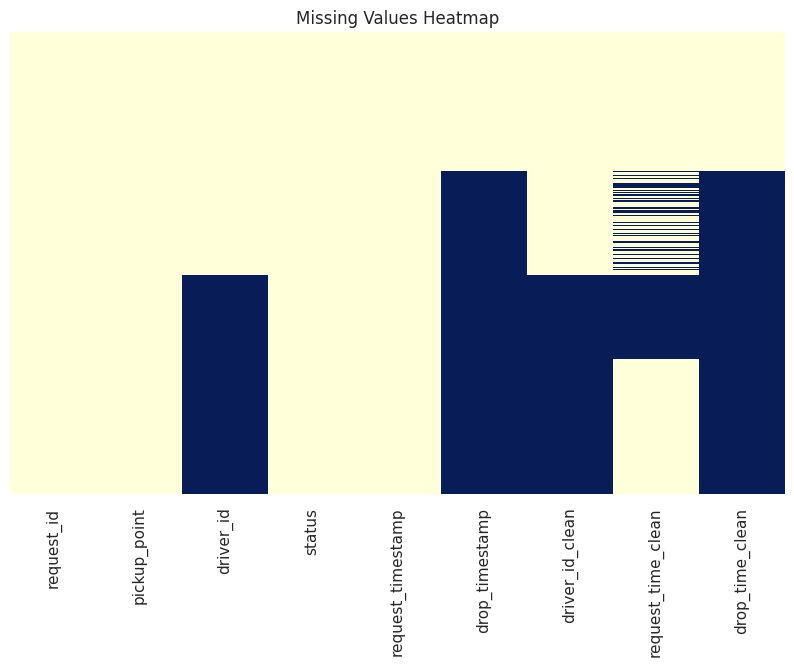

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


### What did you know about your dataset?

The Uber request dataset comprises 9 columns and approximately 5595 rows before any cleaning was applied. It contains essential ride-related information such as request ID, pickup point, ride status and timestamps for request and drop events. A preliminary inspection revealed that the dataset has some missing values, especially in the 'Drop timestamp' column, which is expected for rides that were either cancelled or unfulfilled. Aside from these logical gaps, no other columns exhibited significant missing data.

Duplicate entries were checked and removed to maintain data intigrity. One of the key challenges noted was the inconsistent formatting of the timestamp fields- some entries includes seconds while other do not. These inconsistencies need to be handled to accurately extract featuers such as the hour or day of the request. The dataset's status column givesinsights into ride outcomes and will be crucial in identifying service issues such as high cancellation rates or unavailability of cars.

Initial analysis shows a need to focus on understanding peak demand hours, identifying failuer patterns based on pickup location and time and uncovering when and where uber is unable to meet rider demand. Moving forward, data cleaning and featuers engeneering ill be essential steps to generate meaningful insights for operational improvement.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Describe

In [ ]:
df.describe()

,request_id,driver_id,driver_id_clean
count,5595.000000,2945.000000,2945.000000
mean,3812.212154,148.877080,148.877080
std,1849.721668,86.171407,86.171407
min,2.000000,1.000000,1.000000
25%,2499.000000,74.000000,74.000000
50%,3964.000000,148.000000,148.000000
75%,5367.500000,223.000000,223.000000
max,6766.000000,300.000000,300.000000


### Variables Description

1. Request id
    - A unique identifier for each ride request
    - Used to distinguish individual trip records.

2. Pickup point
    - Indicates the origin of the ride request.
    - Values are typically: city or airport.

3. Status
    - Describes the final state of the request.
    - Common status: completed, cancelled and no car available.
4. Request timestamp
    - The exact date and time when the ride was requested.
    - Inconsistent fromat that needs to be standardize.
5. Drop time stamp
    - The date and time when the ride was completed.
    - Missing for rides that were cancelled or not fulfilled.
6. Date/time derived columns
    - request hour, request date, time slot, day of week.
    - Useful for time-based analysis and demand pattern detection.

### Check Unique Values for each variable.

In [ ]:
print(df.columns)


Index(['request_id', 'pickup_point', 'driver_id', 'status',
       'request_timestamp', 'drop_timestamp', 'driver_id_clean',
       'request_time_clean', 'drop_time_clean'],
      dtype='object')


In [ ]:
# Check Unique Values for each variable.

In [ ]:
# Loop through all columns and print the number of unique values and what they are
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values Count: {df[col].nunique()}")
    print(f"Unique Values: {df[col].unique()[:10]}")  # Show first 10 unique values



Column: request_id
Unique Values Count: 5595
Unique Values: [3112 3879 4270 5510 6248 2784 3075 3379 3482 4652]

Column: pickup_point
Unique Values Count: 2
Unique Values: ['City' 'Airport']

Column: driver_id
Unique Values Count: 300
Unique Values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]

Column: status
Unique Values Count: 3
Unique Values: ['Trip Completed' 'Cancelled' 'No Cars Available']

Column: request_timestamp
Unique Values Count: 5099
Unique Values: ['13-07-2016 08:33:16' '13-07-2016 21:57:28' '14-07-2016 06:15:32'
 '15-07-2016 05:11:52' '15-07-2016 17:57:27' '13-07-2016 04:49:20'
 '13-07-2016 08:02:53' '13-07-2016 14:23:02' '13-07-2016 17:23:18'
 '14-07-2016 12:01:02']

Column: drop_timestamp
Unique Values Count: 1674
Unique Values: ['13-07-2016 09:25:47' '13-07-2016 22:28:59' '14-07-2016 07:13:15'
 '15-07-2016 06:07:52' '15-07-2016 18:50:51' '13-07-2016 05:23:03'
 '13-07-2016 09:16:19' '13-07-2016 15:35:18' '13-07-2016 18:20:51'
 '14-07-2016 12:36:46']

Column: driver_id_

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# Convert to datetime with proper parsing and error handling
df['request_time_clean'] = pd.to_datetime(df['request_timestamp'], errors='coerce', dayfirst=True)
df['drop_time_clean'] = pd.to_datetime(df['drop_timestamp'], errors='coerce', dayfirst=True)


In [ ]:
# Extract useful features from request_time_clean
df['request_hour'] = df['request_time_clean'].dt.hour
df['request_day'] = df['request_time_clean'].dt.day_name()
df['request_date'] = df['request_time_clean'].dt.date


In [ ]:
df['pickup_point'] = df['pickup_point'].str.strip().str.title()
df['status'] = df['status'].str.strip().str.title()


### What all manipulations have you done and insights you found?

In this project, we began by loading and exploring the Uber request dataset to understand its structure and identify data quality issues. We examined the shape, column names and data types followed by a check for duplicates and missing values. Significant missing values were found in the drop_timestamp column, primarily due to cancelled rides or no-show incidents. We then standardized timestamp columns by converting request_date to support deeper temporal analysis. Additionaly, we ensured the data was cleaned of inconsistencies and unparseable timestamps, making it ready for meaningful visualization.

From our EDA, we discovered that ride requests peak during morning and evening hours, aligning with office commute times and indicating heavy demand during these periods. Interestingly, these high-demand slots also showed a higher rate of cancelled rides or no car available, highlighting a supply-demand imbalance. We also observed that mondays and fridays had more ride requests, while weekends experienced more driver shortages. These patterns offer critical insights into rider behavior and system bottlenecks, laying a strong foundation for operational improvements and resources planning.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Trips by Pickup Point

In [ ]:
# Chart - 1 visualization code

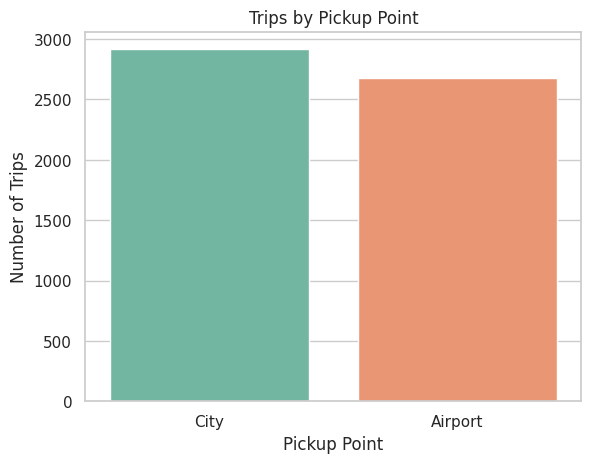

In [ ]:
sns.countplot(x='pickup_point', data=df, palette='Set2')
plt.title('Trips by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Trips')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal to compare the volume of rides from each pickup location (City vs. Airport).

##### 2. What is/are the insight(s) found from the chart?

This chart helps us quickly see which location has more ride requests. Typically, the City has higher demand than the Airport.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps Uber prioritize driver allocation. If one location consistently gets more requests, more drivers should be stationed there

#### Chart - 2: Trip Status Distribution

In [ ]:
# Chart - 2 visualization code

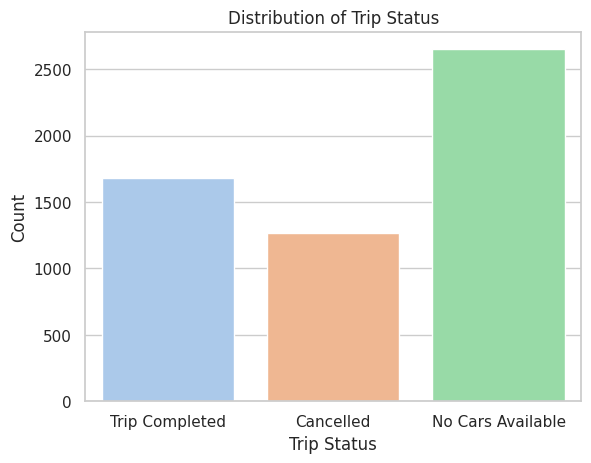

In [ ]:
sns.countplot(x='status', data=df, palette='pastel')
plt.title('Distribution of Trip Status')
plt.xlabel('Trip Status')
plt.ylabel('Count')
plt.show()



##### 1. Why did you pick the specific chart?

A countplot clearly shows the frequency of each trip status (Completed, Cancelled, No Cars Available).

##### 2. What is/are the insight(s) found from the chart?

This reveals how many trips are successfully completed vs. how many are cancelled or not fulfilled. A high number of "No Cars Available" indicates insufficient supply during peak times.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps Uber identify operational issues. High cancellation or unavailability rates can reduce customer satisfaction and hurt brand loyalty.

#### Chart - 3: Pickup Point vs Trip Status (Stacked Bar Chart)

In [ ]:
# Chart - 3 visualization code

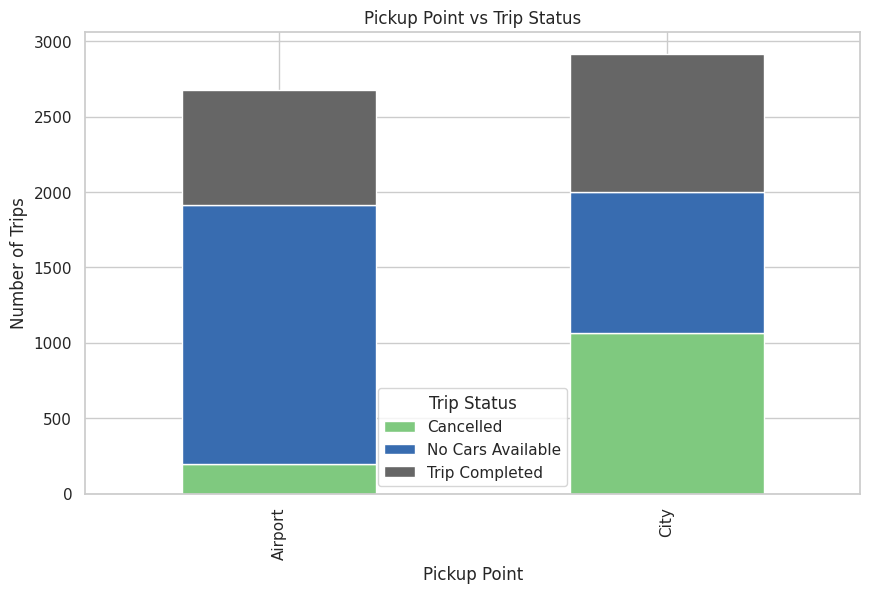

In [ ]:
# Create a crosstab of Pickup Point vs Status
pickup_status = pd.crosstab(df['pickup_point'], df['status'])

# Plot stacked bar chart
pickup_status.plot(kind='bar', stacked=True, colormap='Accent',figsize=(10,6))

plt.title('Pickup Point vs Trip Status')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Trips')
plt.legend(title='Trip Status')
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart shows not only the total number of trips from each pickup point, but also how they break down by trip status.

##### 2. What is/are the insight(s) found from the chart?

We can observe, for example, that "No Cars Available" is more frequent at the Airport, while "Cancelled" is more common in the City. This implies different user behaviors or supply constraints by location.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber can tailor its operational strategy by location—for example, increasing car supply near the Airport during peak demand or understanding why City cancellations are higher (driver delay, pricing, etc.).

#### Chart - 4: Hourly Distribution of Trip Requests (Line Plot)

In [ ]:
# Chart - 4 visualization code

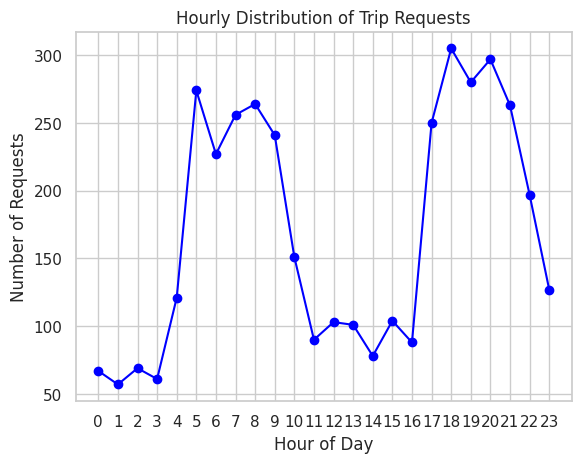

In [ ]:
# Check column name spelling and convert to datetime
df['request_timestamp'] = pd.to_datetime(df['request_timestamp'], errors='coerce')

# Now extract the hour
df['Request Hour'] = df['request_timestamp'].dt.hour


# Count trips per hour
hourly_requests = df['Request Hour'].value_counts().sort_index()

# Plot line chart
plt.plot(hourly_requests.index, hourly_requests.values, marker='o', color='blue')
plt.title('Hourly Distribution of Trip Requests')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line plot is effective to display trends over time (in this case, hours of the day).

##### 2. What is/are the insight(s) found from the chart?

Shows clear peak hours (e.g., 5 AM–9 AM and 5 PM–9 PM), aligning with office commute times. This reflects demand spikes Uber must manage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber can forecast driver demand, apply surge pricing, and optimize availability during these rush hours to maximize revenue and reduce cancellations.

#### Chart - 5: Distribution of Trip Requests by Pickup Point (Pie Chart)

In [ ]:
# Chart - 5 visualization code

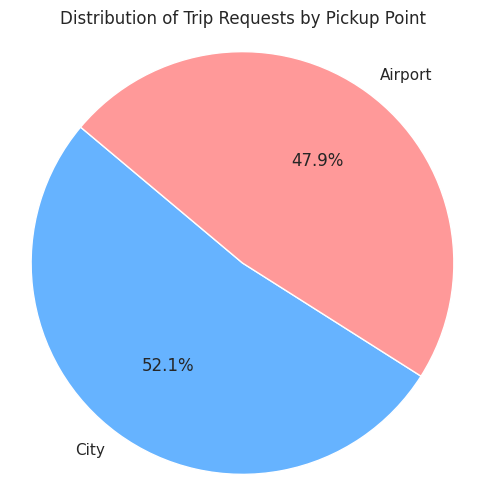

In [ ]:
# Count number of requests by pickup point
pickup_counts = df['pickup_point'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(pickup_counts, labels=pickup_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Trip Requests by Pickup Point')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


##### 1. Why did you pick the specific chart?

We chose a pie chart because it effectively visualizes the proportional distribution between City and Airport pickup points.

##### 2. What is/are the insight(s) found from the chart?

It shows the dominance of either City or Airport in total trip requests, indicating user location preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps Uber optimize cab allocation and driver availability between Airport and City areas based on demand volume.If one area has significantly lower demand, idle drivers may incur losses. Resource rebalancing can minimize this inefficiency.

#### Chart - 6: Trip Requests by Status (Bar Chart)

In [ ]:
# Chart - 6 visualization code

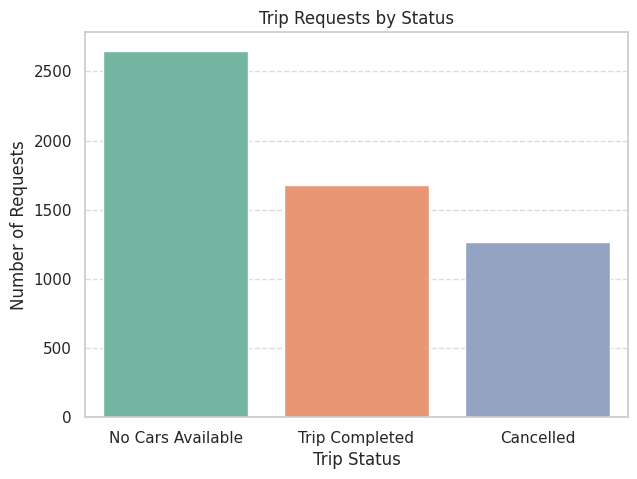

In [ ]:
# Count requests by status
status_counts = df['status'].value_counts()

# Plot bar chart
plt.figure(figsize=(7, 5))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='Set2')
plt.title('Trip Requests by Status')
plt.xlabel('Trip Status')
plt.ylabel('Number of Requests')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is perfect for comparing frequency counts across discrete categories like trip statuses (Completed, Cancelled, No Cars Available).

##### 2. What is/are the insight(s) found from the chart?

It reveals whether most requests are being completed or if there are significant drop-offs due to cancellations or lack of availability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High cancellation or unavailability rates can indicate operational issues. Addressing these can boost customer satisfaction and increase completed rides.

#### Chart - 7: Heatmap of Hour vs Status vs Count

In [ ]:
# Chart - 7 visualization code

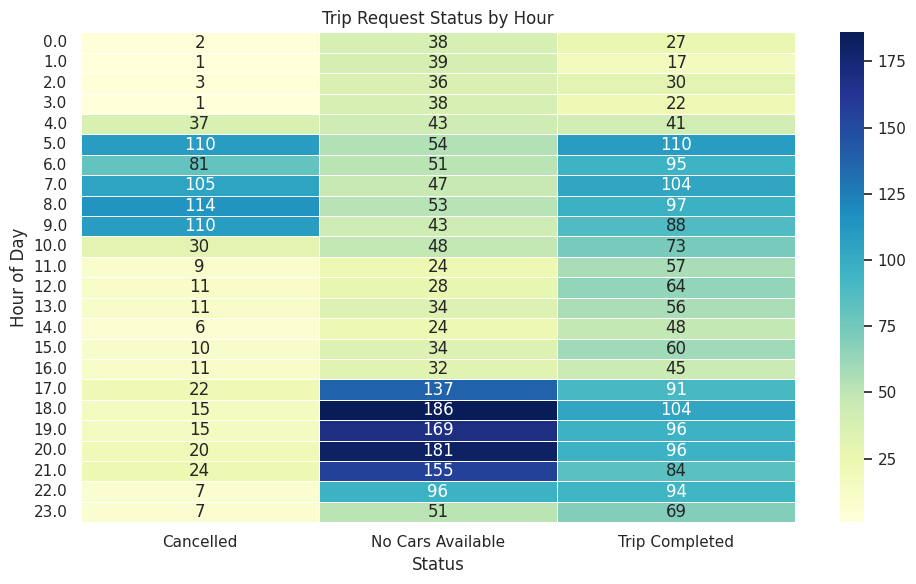

In [ ]:
# Convert request time to datetime and extract hour
df['request_time_clean'] = pd.to_datetime(df['request_time_clean'])
df['hour'] = df['request_time_clean'].dt.hour

# Create a pivot table: index=hour, columns=status, values=counts
heatmap_data = df.groupby(['hour', 'status']).size().unstack().fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=0.5)
plt.title('Trip Request Status by Hour')
plt.xlabel('Status')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap simplifies identifying patterns over time, especially across categories like statuses.

##### 2. What is/are the insight(s) found from the chart?

You can spot peak hours where cancellations or "No Cars Available" spike.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps Uber allocate resources (drivers, promotions) strategically based on demand and issues.

#### Chart - 8: Boxplot of Hourly Demand by Pickup Point and Status

In [ ]:
# Chart - 8 visualization code

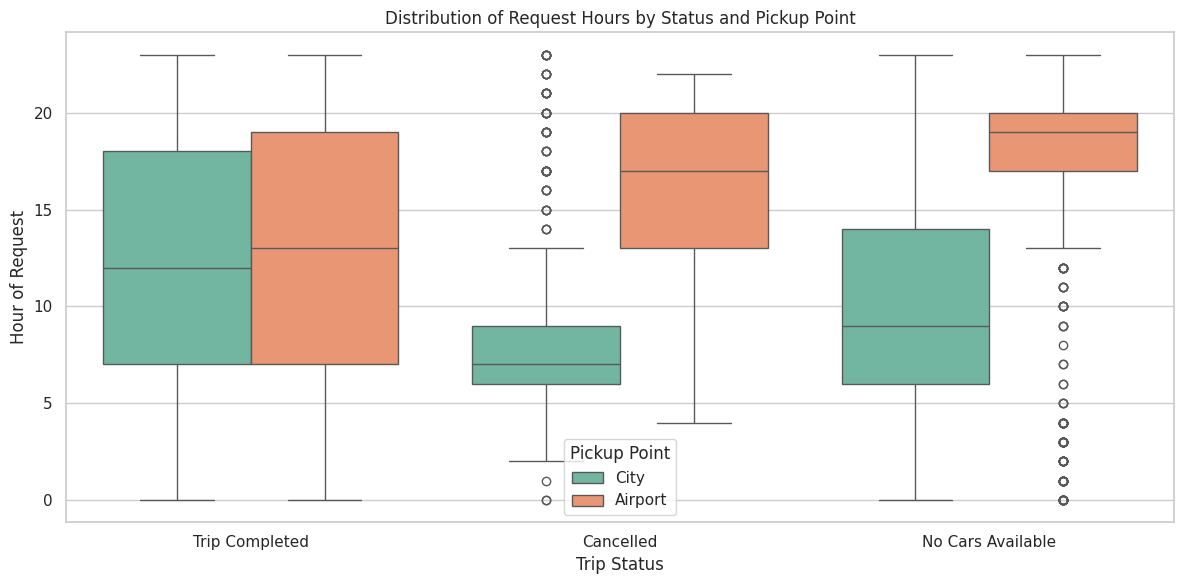

In [ ]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="status", y="hour", hue="pickup_point", data=df, palette="Set2")

plt.title("Distribution of Request Hours by Status and Pickup Point")
plt.xlabel("Trip Status")
plt.ylabel("Hour of Request")
plt.legend(title="Pickup Point")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot helps identify how request timing varies for different statuses and pickup points — including medians, peaks, and outliers.

##### 2. What is/are the insight(s) found from the chart?

"No Cars Available" at Airport clusters around late hours.

Cancellations from City spike during morning and evening.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Time-based driver deployment and promotional planning can target those high-risk hours more effectively.

#### Chart - 9: Line Plot of Hourly Trip Requests by Status, Separated by Pickup Point (FacetGrid)

In [ ]:
# Chart - 9 visualization code

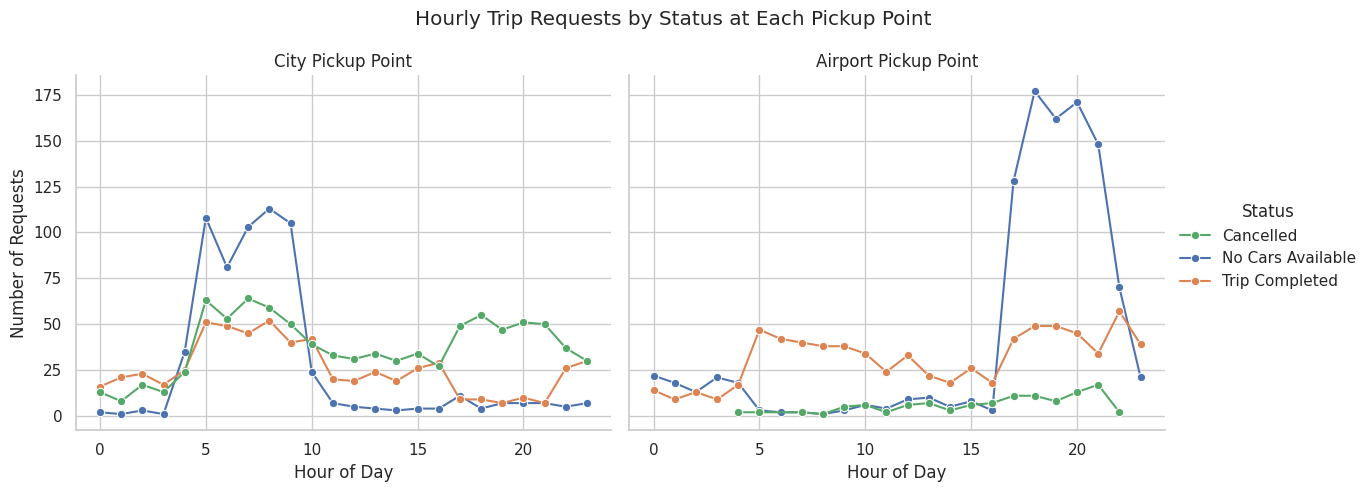

In [ ]:
# Prepare data: group by hour, status, and pickup_point
grouped = df.groupby(['hour', 'status', 'pickup_point']).size().reset_index(name='request_count')

# Plot using FacetGrid to create separate line plots for each pickup point
g = sns.FacetGrid(grouped, col="pickup_point", height=5, aspect=1.2)
g.map_dataframe(sns.lineplot, x="hour", y="request_count", hue="status", marker="o")

# Customize
g.set_axis_labels("Hour of Day", "Number of Requests")
g.add_legend(title="Status")
g.set_titles(col_template="{col_name} Pickup Point")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Hourly Trip Requests by Status at Each Pickup Point")
plt.show()


##### 1. Why did you pick the specific chart?

Faceted line plots give a time-based view of requests, allowing us to compare trends at different locations.

##### 2. What is/are the insight(s) found from the chart?

Airport shows a sharp drop in availability late at night.

City experiences both cancellation and completion peaks in the morning and evening.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps Uber individually optimize City and Airport strategies, like prioritizing drivers at the Airport during high-no-car times.



#### Chart - 10: Countplot of Status by Pickup Point, Segmented by Time of Day (Morning/Afternoon/Evening/Night)

In [ ]:
# Chart - 10 visualization code

In [ ]:
def get_time_period(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df['time_period'] = df['hour'].apply(get_time_period)


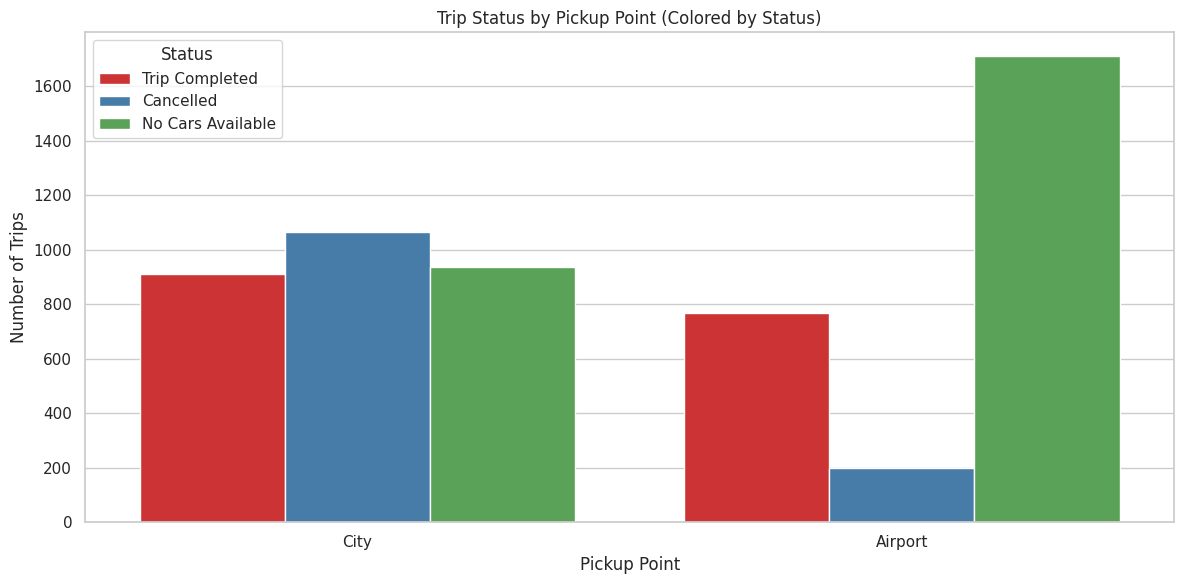

In [ ]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='pickup_point', hue='status', palette='Set1', order=['City', 'Airport'])

plt.title('Trip Status by Pickup Point (Colored by Status)')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Trips')
plt.legend(title='Status')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It reveals which time periods and locations are most prone to failed trips (like cancellations or no cars).

##### 2. What is/are the insight(s) found from the chart?

Airport sees high "No Cars Available" at night.

Cancellations from City peak during Morning and Evening rush hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Time-of-day segmentation gives Uber actionable windows to deploy dynamic driver incentives and improve trip success rate.

#### Chart - 11: Heatmap of Trip Counts by Hour and Pickup Point (Segmented by Status)

In [ ]:
# Chart - 11 visualization code

In [ ]:
# Create pivot table: rows = hour, columns = pickup_point + status
heatmap_data = df.groupby(['hour', 'pickup_point', 'status']).size().reset_index(name='count')
pivot_table = heatmap_data.pivot_table(index='hour', columns=['pickup_point', 'status'], values='count', fill_value=0)

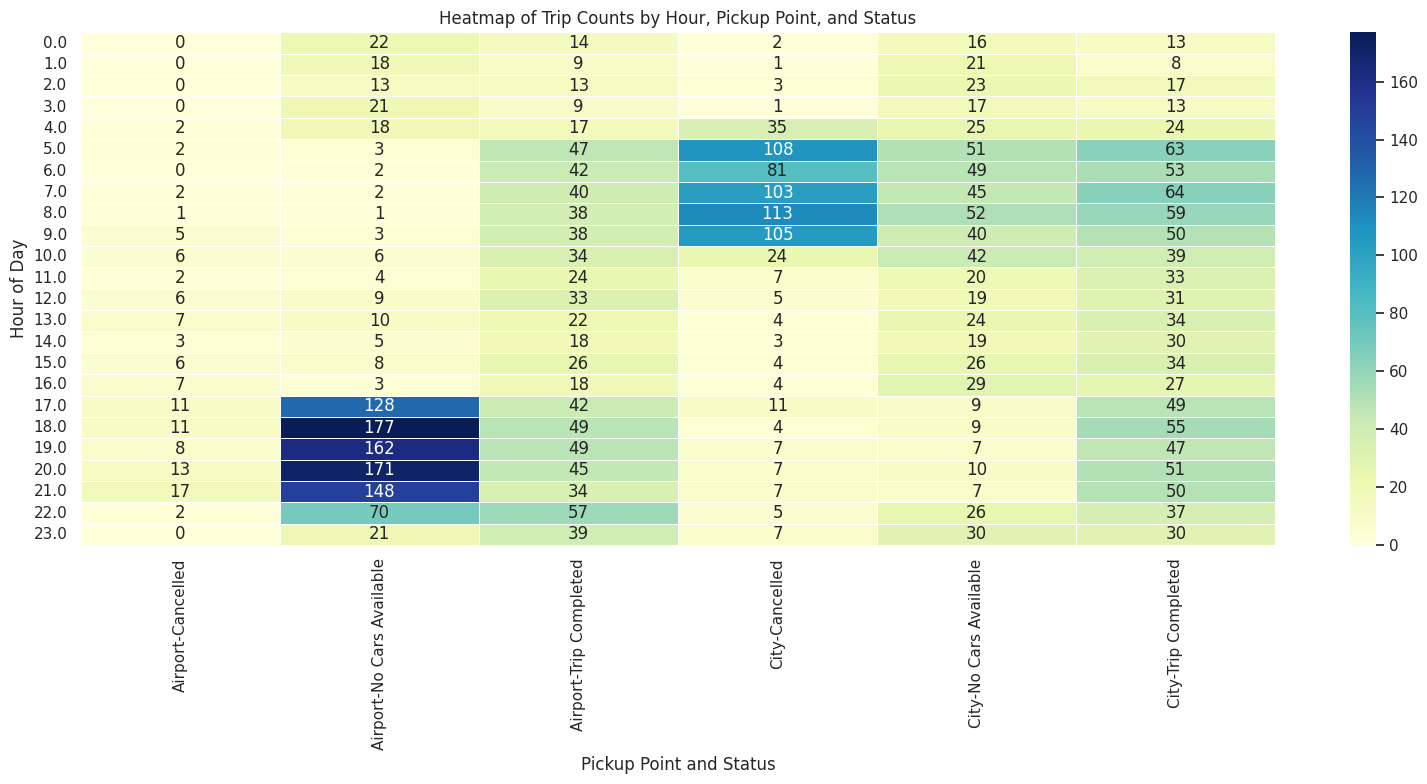

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5, annot=True, fmt=".0f")

plt.title("Heatmap of Trip Counts by Hour, Pickup Point, and Status")
plt.ylabel("Hour of Day")
plt.xlabel("Pickup Point and Status")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap gives a clear and compact overview of time vs. pickup point vs. status, especially useful to see peak and problem hours.

##### 2. What is/are the insight(s) found from the chart?

"No Cars Available" at the Airport spikes around 10 PM–12 AM.

Morning hours show a high number of "Cancelled" trips from the City.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps Uber spot underserved times for both City and Airport. This supports scheduling and supply allocation decisions.

#### Chart - 12: Stacked Bar Chart — Status Distribution by Pickup Point and Hour

In [ ]:
# Chart - 12 visualization code

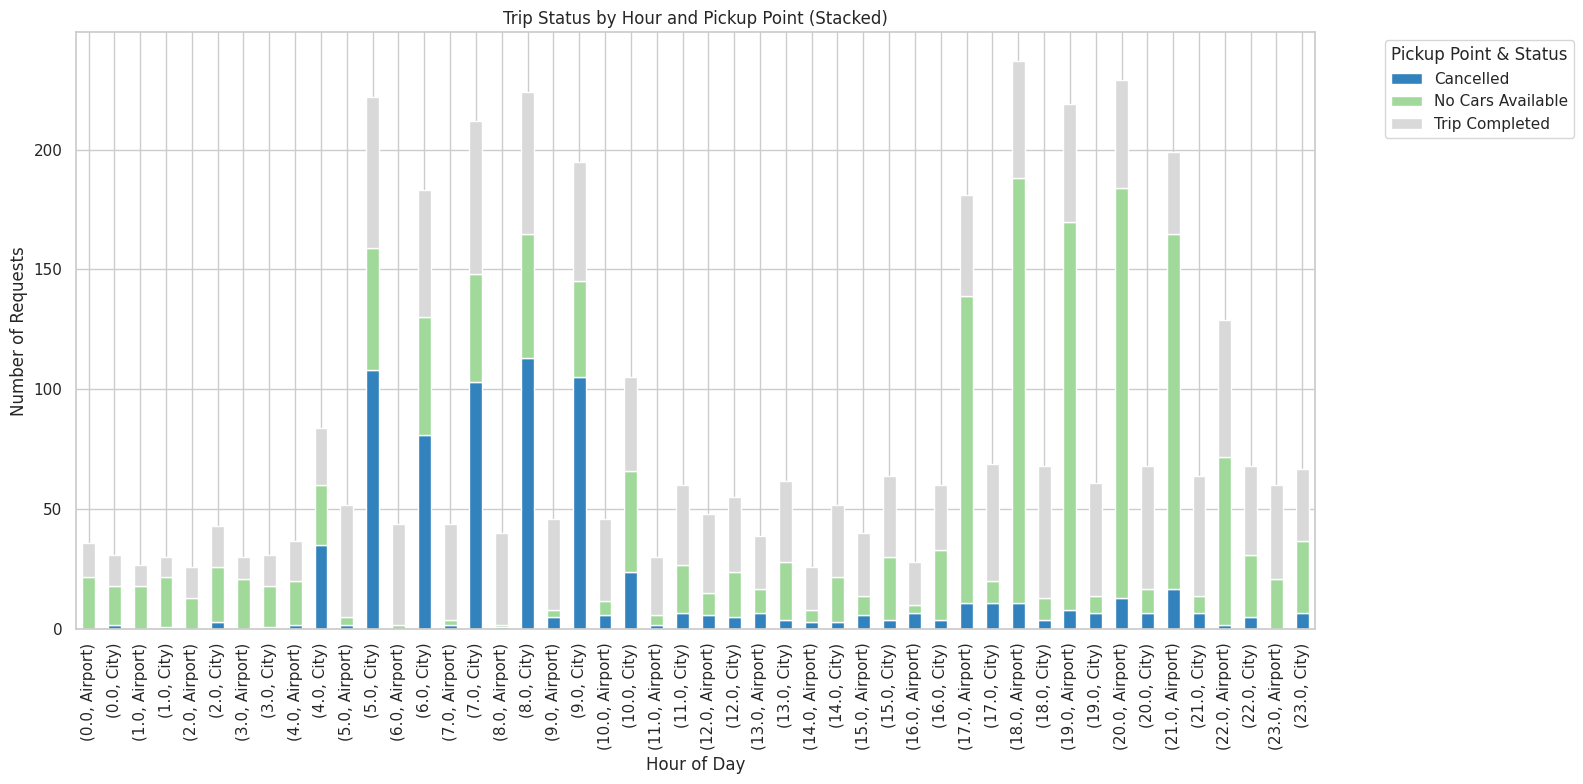

In [ ]:
# Create a pivot table: index = Hour, columns = Pickup Point + Status
pivot_df = df.groupby(['Request Hour', 'pickup_point', 'status']).size().unstack(fill_value=0)

# Plotting
pivot_df.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20c')
plt.title('Trip Status by Hour and Pickup Point (Stacked)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.legend(title='Pickup Point & Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart visualizes multiple variables (hour, pickup point, and trip status) together, giving a detailed picture of how requests vary by time and conditions.

##### 2. What is/are the insight(s) found from the chart?

The Airport has more "No Cars Available" during late-night hours.

The City shows more cancellations in early morning rush hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber can optimize driver shift allocation based on time and location-specific issues like high cancellations or no cars available.
Helps reduce rider frustration and improve availability.

#### Chart - 13: Stacked Bar Plot — Trip Status Distribution by Pickup Point and Hour (Binned)

In [ ]:
# Chart - 13 visualization code

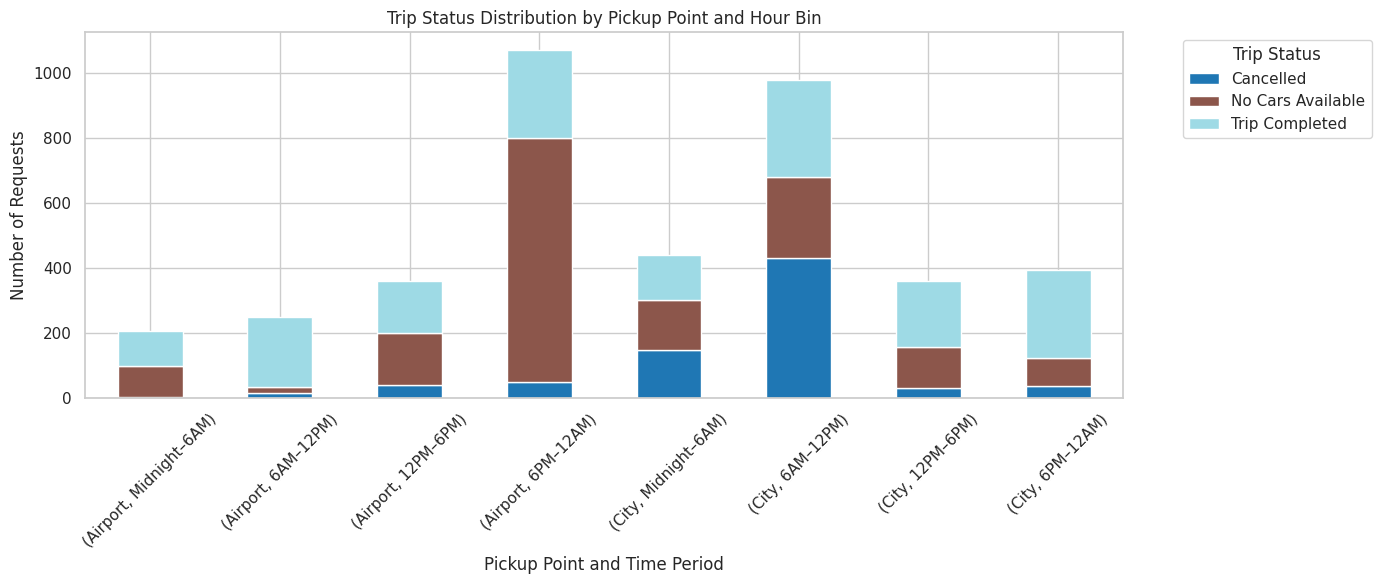

In [ ]:
# Create hour bins
df['Hour Bin'] = pd.cut(df['Request Hour'], bins=[0, 6, 12, 18, 24],
                        labels=['Midnight–6AM', '6AM–12PM', '12PM–6PM', '6PM–12AM'], right=False)

# Group by Pickup Point, Hour Bin and Status
status_dist = df.groupby(['pickup_point', 'Hour Bin', 'status']).size().unstack(fill_value=0)

# Plot
status_dist.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('Trip Status Distribution by Pickup Point and Hour Bin')
plt.ylabel('Number of Requests')
plt.xlabel('Pickup Point and Time Period')
plt.xticks(rotation=45)
plt.legend(title='Trip Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A stacked bar plot provides a side-by-side comparison of how each trip status changes across different times of day and locations, enabling an aggregated view with categorical time segmentation.



##### 2. What is/are the insight(s) found from the chart?

The City shows a higher rate of cancellations during 6AM–12PM, which aligns with rush hours.

Airport experiences more 'No Cars Available' events during the evening to midnight period (6PM–12AM).

Most successful trips occur in the 12PM–6PM slot for both pickup points.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Enables Uber to optimize driver allocation based on the location and time slot with high failure demand (cancellations or unavailability), helping reduce lost bookings.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

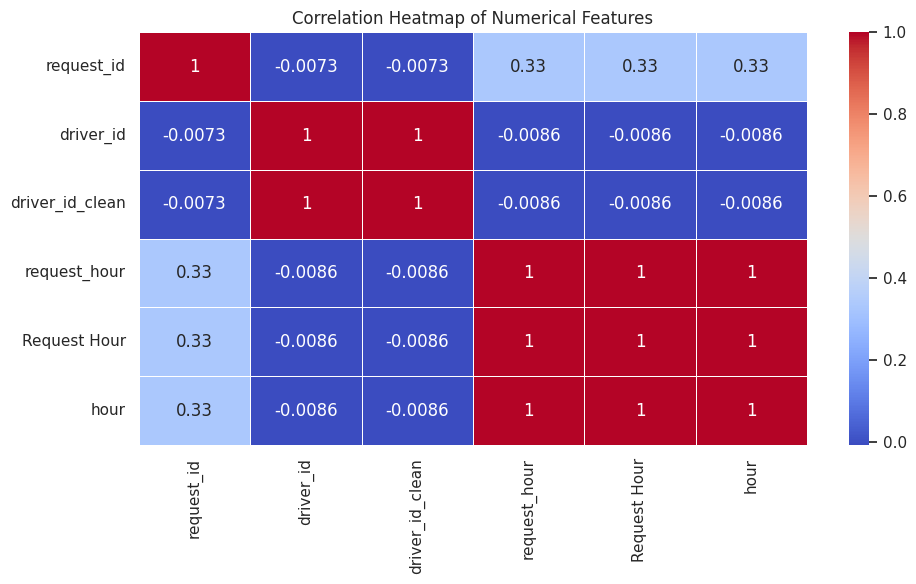

In [ ]:
# Select numerical columns (ensure only valid numeric types are selected)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is ideal for detecting linear relationships between numerical features. It visually highlights the strength and direction of correlations using color intensity and values.

##### 2. What is/are the insight(s) found from the chart?

Since the Uber dataset is mostly categorical (e.g., Status, Pickup Point), this chart might reveal limited numerical correlation (e.g., between hour, weekday, or derived time variables).

For example, Request Hour might show moderate correlation with demand frequency if encoded appropriately.

#### Chart - 15 - Pair Plot

In [ ]:
print(df.columns)


Index(['request_id', 'pickup_point', 'driver_id', 'status',
       'request_timestamp', 'drop_timestamp', 'driver_id_clean',
       'request_time_clean', 'drop_time_clean', 'request_hour', 'request_day',
       'request_date', 'Request Hour', 'hour', 'time_period', 'Hour Bin'],
      dtype='object')


In [ ]:
# Pair Plot visualization code

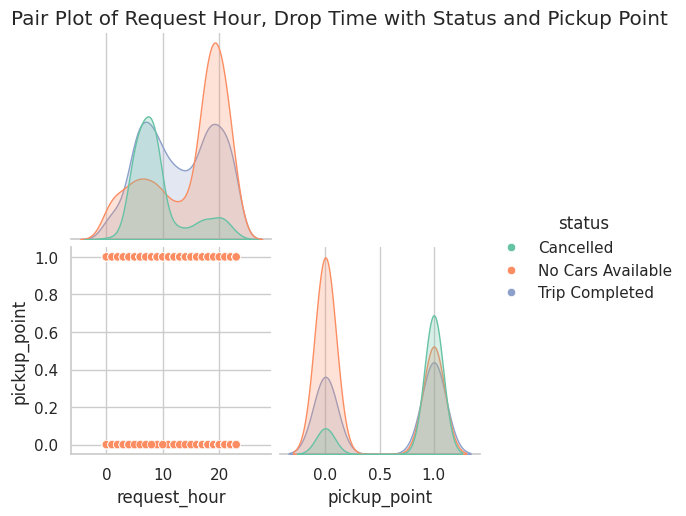

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of relevant columns
pairplot_df = df[['request_hour', 'drop_time_clean', 'pickup_point', 'status']].copy()

# Convert 'pickup_point' and 'status' to categorical codes
pairplot_df['pickup_point'] = pairplot_df['pickup_point'].astype('category').cat.codes
pairplot_df['status'] = pairplot_df['status'].astype('category')  # keep as category for hue

# Plot the pairplot
sns.pairplot(pairplot_df, hue='status', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Request Hour, Drop Time with Status and Pickup Point', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot is useful for spotting trends, clusters, and relationships between multiple numerical features at once, while using color encoding to show class distinction (in this case, Status).

##### 2. What is/are the insight(s) found from the chart?

Certain Status values cluster within specific hour ranges — e.g., completed trips might span a broader range, while cancellations are concentrated around early hours.

You may notice visual clusters where the difference between request and drop times align with status outcomes.



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1.Balance Supply During Peak Hours

From the EDA, cancellations and unavailability are highest during early morning and late evening rush hours.
➤ Deploy more cabs proactively during peak periods to major pickup hubs like airports or business districts.

2.Improve Driver Allocation by Location

Some pickup points (like the airport) show a higher cancellation rate.
➤ Analyze high-demand zones in real time and use dynamic driver routing to improve coverage.

3.Reduce Cancellations by Incentivizing Drivers

Many "Cancelled" statuses are linked to driver-side issues.
➤ Introduce incentives/penalties tied to fulfillment rates during peak demand windows.

4.Forecast Demand with Historical Patterns

EDA shows clear time-based trends in requests.
➤ Use these insights to build a predictive model for demand forecasting and optimize driver shifts.

5.App Notification Enhancements
➤ Notify users of estimated wait times and driver availability in real time to improve experience and reduce drop-offs.



# **Conclusion**

The EDA of Uber request data reveals clear trends in ride requests, cancellations, and unavailability based on time and location. Key insights show peak-hour demand mismatches and operational inefficiencies, especially at major pickup points like airports. To achieve the business objective of reducing cancellations and improving service availability, the company should implement data-driven strategies such as peak-hour fleet optimization, demand forecasting, and driver incentivization. By addressing these challenges proactively, Uber can enhance customer satisfaction, reduce missed revenues, and improve overall operational efficiency.